## Dataset exploration

In [52]:
from thesis import SAVED_RESULTS_PATH
import os
import matplotlib.pyplot as plt

FIGURES_PATH = SAVED_RESULTS_PATH / "figures"
os.makedirs(FIGURES_PATH, exist_ok=True)


### Nault

In [53]:
from thesis.datasets import NaultPipeline
import scanpy as sc

nault = NaultPipeline()
nault_data = nault.dataset

Preprocessing started
Preprocessing finished


In [54]:
sc.pp.pca(nault_data)
sc.pp.neighbors(nault_data)
sc.tl.umap(nault_data)


/g/kreshuk/katzalis/conda/miniforge3/envs/thesis/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


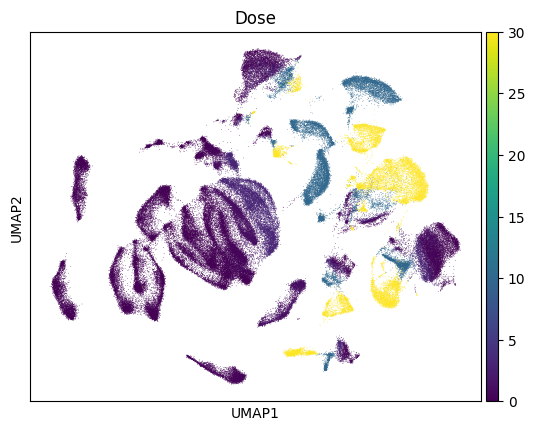

In [55]:
sc.pl.umap(nault_data, color=['Dose'], show=False)
plt.savefig(FIGURES_PATH / 'nault_dose_umap.pdf', dpi=150, bbox_inches='tight')
plt.show()

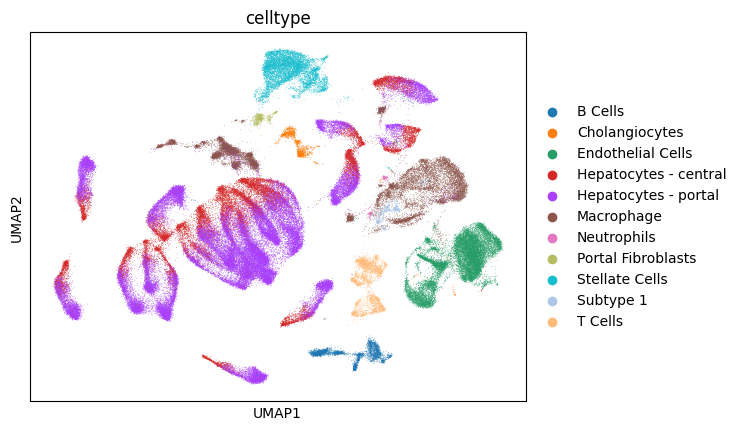

In [56]:
sc.pl.umap(nault_data, color=['celltype'], show=False)
plt.savefig(FIGURES_PATH / 'nault_cell_umap.pdf', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_679834/155529915.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/155529915.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/155529915.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/155529915.py:23: FutureWarning: The default of observed=False is deprecated and will

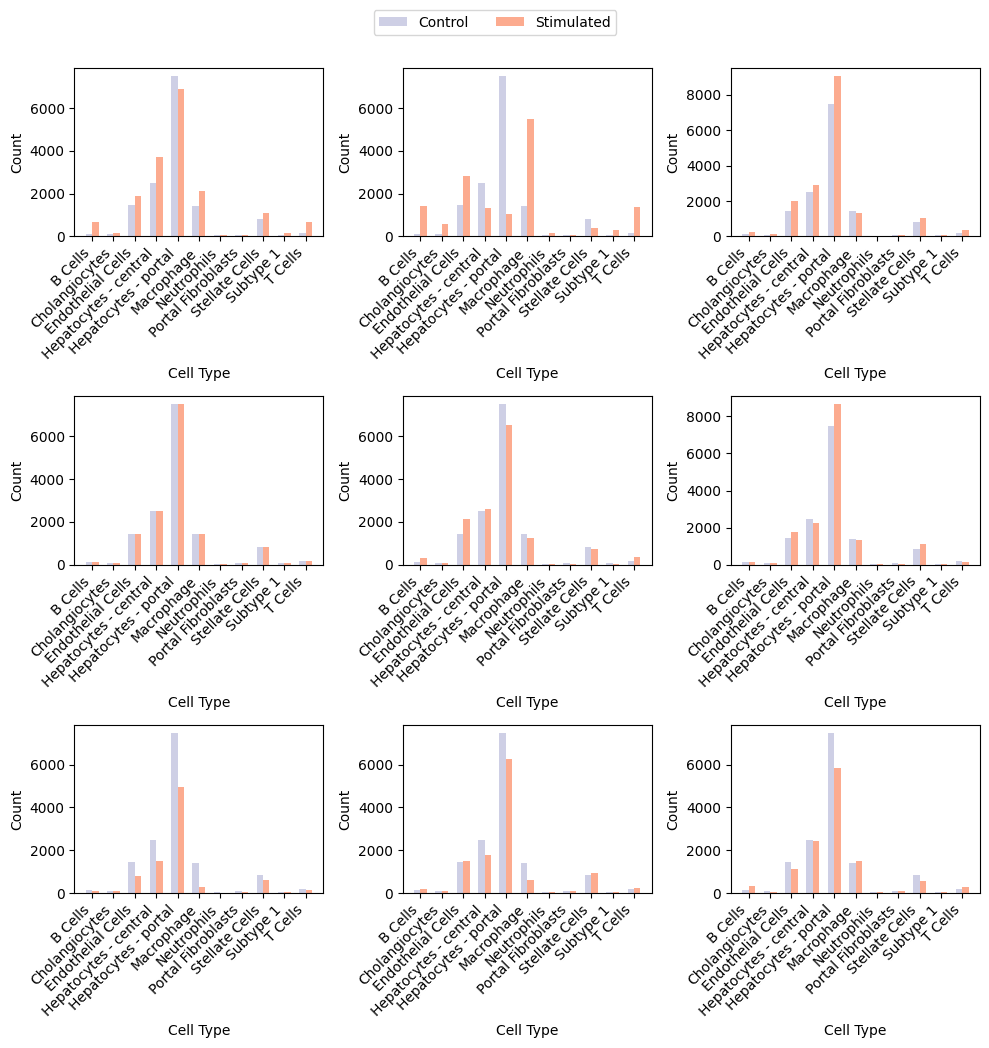

In [57]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
width = 0.3

nault_df = nault_data.obs.sort_values("celltype")
cell_types = nault_df["celltype"].unique().tolist()
dosages = nault_df["Dose"].unique().tolist()

for ax, dosage in zip(axes, dosages):

    control = (
        nault_df[nault_df["Dose"] == 0]
        .groupby("celltype")
        .size()
        .tolist()
    )
    
    perturb = (
        nault_df[nault_df["Dose"] == dosage]
        .groupby("celltype")
        .size()
        .tolist()
    )

    x = np.arange(len(cell_types))

    ax.bar(x - width / 2, control, width, label="Control", color=plt.cm.Purples(0.3))
    ax.bar(x + width / 2, perturb, width, label="Stimulated", color=plt.cm.Reds(0.3))

    ax.set_xticks(x, labels=cell_types, rotation=45, ha="right")
    ax.set_xticklabels(cell_types, rotation=45, ha="right")
    ax.set_xlabel("Cell Type")
    ax.set_ylabel("Count")
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
# plt.title("Control vs Stimulated Condition Counts by Cell Type")
plt.tight_layout()
plt.show()

/tmp/ipykernel_679834/4177578092.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/4177578092.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/4177578092.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("celltype")
/tmp/ipykernel_679834/4177578092.py:25: FutureWarning: The default of observed=False is deprecated and 

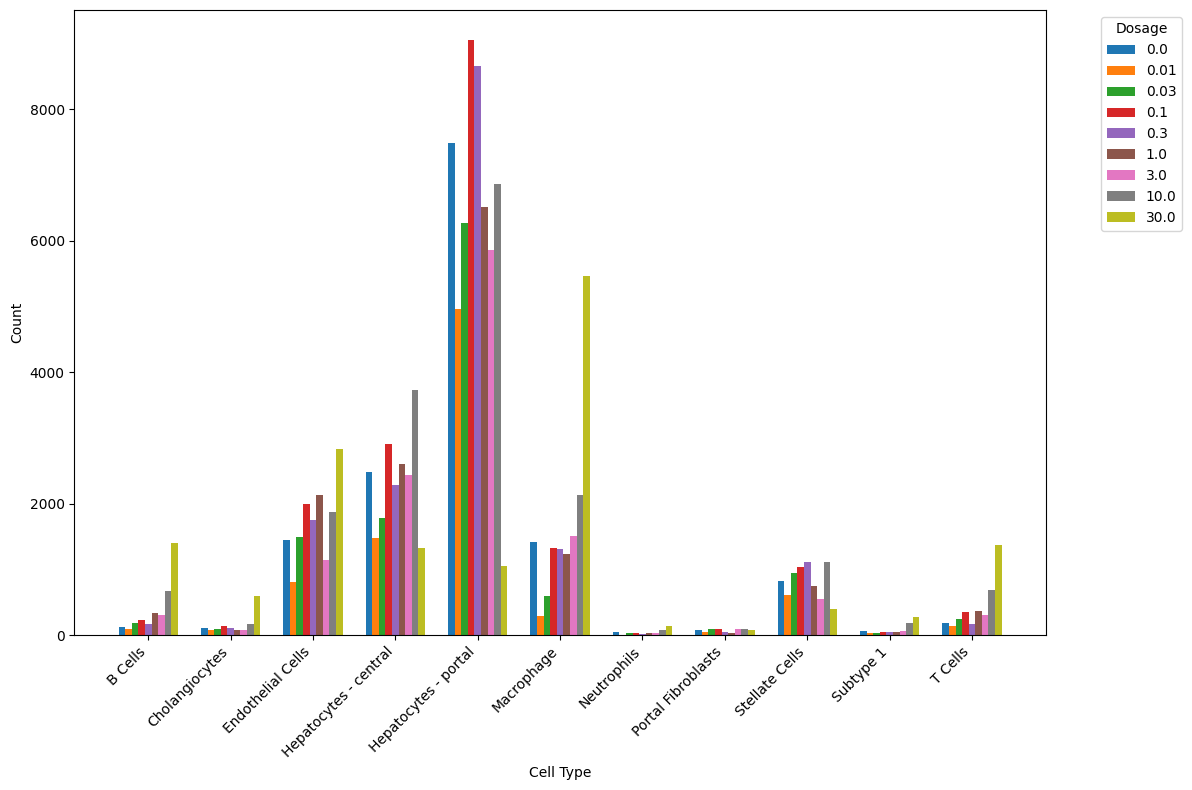

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))  # Single plot for all dosages
width = 0.08  # Adjust width to fit 9 bars

nault_df = nault_data.obs.sort_values("celltype")
cell_types = nault_df["celltype"].unique().tolist()
dosages = sorted(nault_df["Dose"].unique().tolist())  # Ensure dosages are in order

x = np.arange(len(cell_types))  # Positions for each cell type

# Loop over each dosage and add bars for each within a single plot
for i, dosage in enumerate(dosages):
    control = (
        nault_df[nault_df["Dose"] == 0]
        .groupby("celltype")
        .size()
        .reindex(cell_types, fill_value=0)  # Align with cell types
        .tolist()
    )
    
    perturb = (
        nault_df[nault_df["Dose"] == dosage]
        .groupby("celltype")
        .size()
        .reindex(cell_types, fill_value=0)  # Align with cell types
        .tolist()
    )

    # Offset each dosage bar by width * index
    ax.bar(x - width * 4 + i * width, perturb, width, label=f"{dosage}")

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(cell_types, rotation=45, ha="right")
ax.set_xlabel("Cell Type")
ax.set_ylabel("Count")
#ax.set_title("Control vs Stimulated Condition Counts by Cell Type")

# Add legend for dosages
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Dosage")

plt.tight_layout()
plt.savefig(FIGURES_PATH / 'nault_counts.pdf', dpi=150, bbox_inches='tight')
plt.show()


In [59]:
nault_data[nault_data.obs['celltype'] == 'Hepatocytes - portal'].obs.groupby('Dose').size()

Dose
0.00     7492
0.01     4955
0.03     6271
0.10     9056
0.30     8651
1.00     6511
3.00     5860
10.00    6869
30.00    1052
dtype: int64

### Pbmc

In [60]:
from thesis.datasets import PbmcPipeline
import scanpy as sc

pbmc = PbmcPipeline()
pbmc_data = pbmc.dataset

In [61]:
sc.pp.pca(pbmc_data)
sc.pp.neighbors(pbmc_data)
sc.tl.umap(pbmc_data)

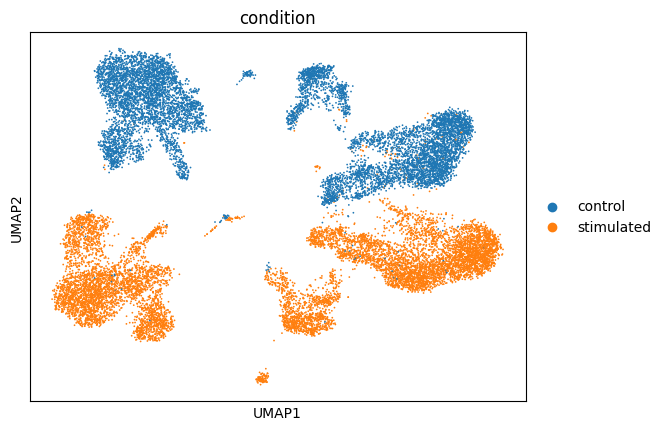

In [62]:
sc.pl.umap(pbmc_data, color=['condition'], show=False)
plt.savefig(FIGURES_PATH / 'pbmc_condtion_umap.pdf', dpi=150, bbox_inches='tight')
plt.show()

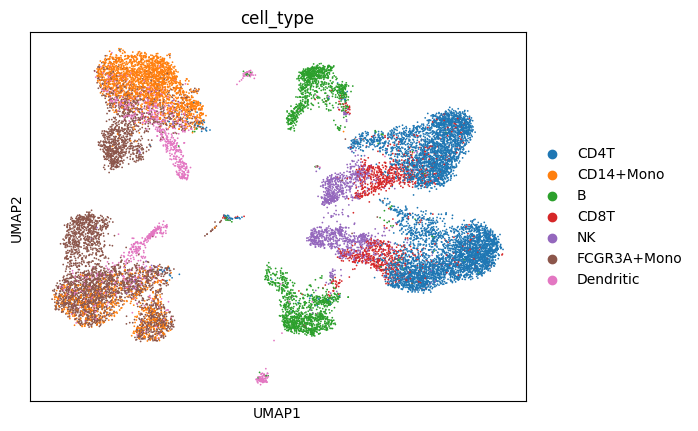

In [63]:
sc.pl.umap(pbmc_data, color=['cell_type'], show=False)
plt.savefig(FIGURES_PATH / 'pbmc_cell_umap.pdf', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_679834/1174117500.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  control = pbmc_data_df[pbmc_data_df['condition'] == 'control'].groupby('cell_type').size().tolist()
/tmp/ipykernel_679834/1174117500.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perturb = pbmc_data_df[pbmc_data_df['condition'] == 'stimulated'].groupby('cell_type').size().tolist()


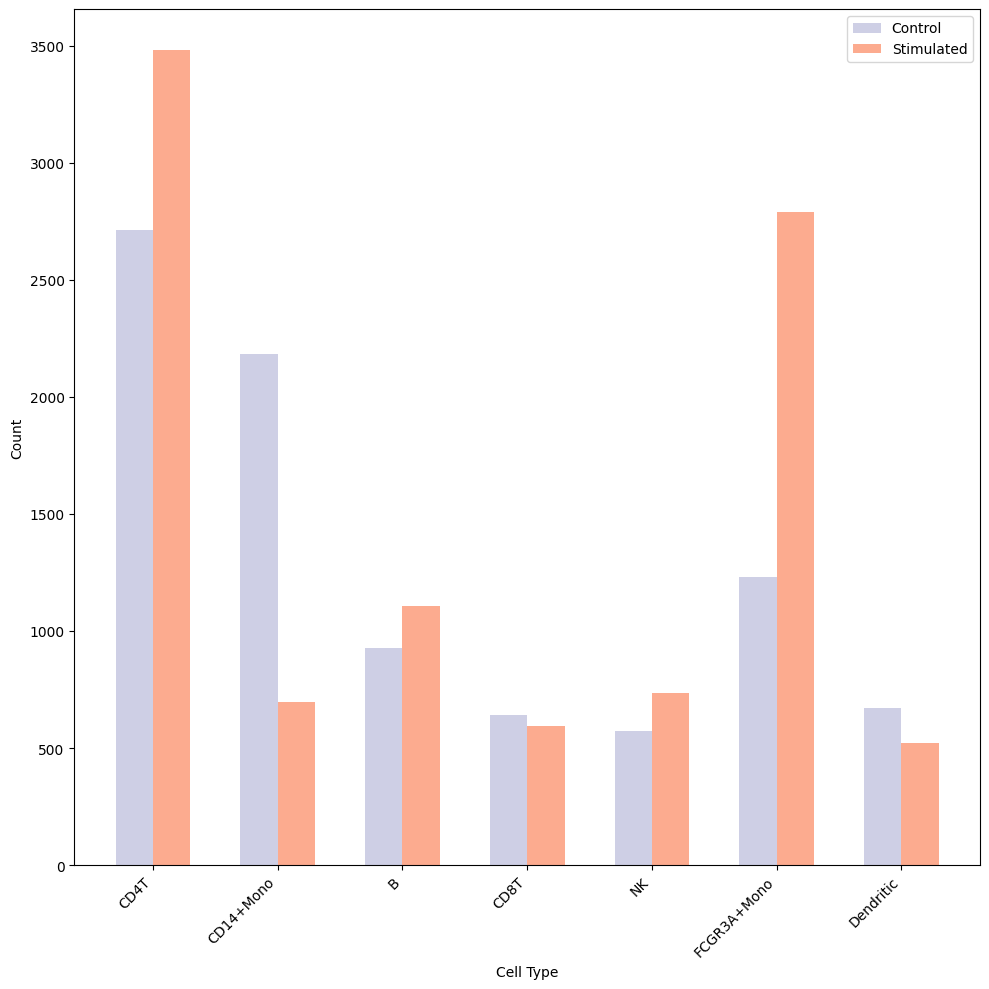

In [64]:
## how many control and perturb per cell type?
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
width = 0.3

pbmc_data_df = pbmc_data.obs.sort_values('cell_type')
cell_types = pbmc_data_df['cell_type'].unique().tolist()

control = pbmc_data_df[pbmc_data_df['condition'] == 'control'].groupby('cell_type').size().tolist()
perturb = pbmc_data_df[pbmc_data_df['condition'] == 'stimulated'].groupby('cell_type').size().tolist()

x = np.arange(len(cell_types))

plt.bar(x - width / 2, control, width, label='Control', color=plt.cm.Purples(0.3))
plt.bar(x + width / 2, perturb, width, label='Stimulated', color=plt.cm.Reds(0.3))

plt.xticks(ticks=x, labels=cell_types, rotation=45, ha='right')
plt.xlabel("Cell Type")
plt.ylabel("Count")
#plt.title("Control vs Stimulated Condition Counts by Cell Type")
plt.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH / 'pbmc_counts.pdf', dpi=150, bbox_inches='tight')
plt.show()

